In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import time
import json
import numpy
import matplotlib.pyplot as plt
import re
import seaborn as sns
from cliffs_delta import cliffs_delta
from scipy.stats import friedmanchisquare
from scipy import stats
from scipy.stats import kruskal





import warnings 
warnings. filterwarnings('ignore')

In [2]:
try:
    df_deepTralog = pd.read_csv("raw_excel/analysis_issues_deepTralog.csv")
    df_deepTralog["Source"] = "DeepTralog"
except Exception as e:
    print(f"{e}")
try:
    df_tensorflow = pd.read_csv("raw_excel/npf_analysis_issues_tensorflow.csv")
#     df_tensorflow = df_tensorflow.sort_values(by='Date_created', ascending=True)
    df_tensorflow["Source"] = "Tensorflow"
except Exception as e:
    print(f"{e}")
try:
    df_jax = pd.read_csv("raw_excel/npf_analysis_issues_jax.csv")
#     df_jax = df_jax.sort_values(by='Date_created', ascending=True)
    df_jax["Source"] = "Jax"
except Exception as e:
    print(f"{e}")
try:
    df_mxnet = pd.read_csv("raw_excel/npf_analysis_issues_mxnet.csv")
    df_mxnet["Source"] = "MXNET"
#     df_mxnet = df_mxnet.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_deeplearning4j = pd.read_csv("raw_excel/npf_analysis_issues_deeplearning4j.csv")
    df_deeplearning4j["Source"] = "Deeplearning4j"
#     df_deeplearning4j = df_deeplearning4j.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_aspnetcore = pd.read_csv("raw_excel/npf_analysis_issues_aspnetcore.csv")
    df_aspnetcore["Source"] = "Aspnetcore"
#     df_aspnetcore = df_aspnetcore.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_yii2 = pd.read_csv("raw_excel/npf_analysis_issues_yii2.csv")
    df_yii2["Source"] = "Yii2"
#     df_yii2 = df_yii2.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_spring = pd.read_csv("raw_excel/npf_analysis_issues_spring-framework.csv")
    df_spring["Source"] = "Spring"
#     df_spring = df_spring.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_CodeIgniter4 = pd.read_csv("raw_excel/npf_analysis_issues_CodeIgniter4.csv")
    df_CodeIgniter4["Source"] = "CodeIgniter4"
#     df_CodeIgniter4 = df_CodeIgniter4.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_node = pd.read_csv("raw_excel/npf_analysis_issues_node.csv")
    df_node["Source"] = "Node"
#     df_node = df_node.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_symfony = pd.read_csv("raw_excel/npf_analysis_issues_symfony.csv")
    df_symfony["Source"] = "Symfony"
#     df_symfony = df_symfony.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_pytorch = pd.read_csv("raw_excel/npf_analysis_issues_pytorch.csv")
    df_pytorch["Source"] = "Pytorch"
#     df_pytorch = df_pytorch.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
try:
    df_keras = pd.read_csv("raw_excel/npf_analysis_issues_keras.csv")
    df_keras["Source"] = "Keras"
#     df_keras = df_keras.sort_values(by='Date_created', ascending=True)
except Exception as e:
    print(f"{e}")
        

In [3]:
# Some statistics for each of the columns
print(f"TENSORFLOW")
print(f"Duration Reported Closed - H-L-M:: {df_tensorflow['Duration_reported_closed'].max()}, {df_tensorflow['Duration_reported_closed'].min()}, {df_tensorflow['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_tensorflow['Count_all_commits'].max()}, {df_tensorflow['Count_all_commits'].min()}, {df_tensorflow['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_tensorflow['Committers'].max()}, {df_tensorflow['Committers'].min()}, {df_tensorflow['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_tensorflow['Duration_reported_first_commit'].max()}, {df_tensorflow['Duration_reported_first_commit'].min()}, {df_tensorflow['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_tensorflow['Duration_first_last_commit'].max()}, {df_tensorflow['Duration_first_last_commit'].min()}, {df_tensorflow['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_tensorflow['Duration_reported_last_commit'].max()}, {df_tensorflow['Duration_reported_last_commit'].min()}, {df_tensorflow['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")

print(f"PYTORCH")
print(f"Duration Reported Closed - H-L-M:: {df_pytorch['Duration_reported_closed'].max()}, {df_pytorch['Duration_reported_closed'].min()}, {df_pytorch['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_pytorch['Count_all_commits'].max()}, {df_pytorch['Count_all_commits'].min()}, {df_pytorch['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_pytorch['Committers'].max()}, {df_pytorch['Committers'].min()}, {df_pytorch['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_pytorch['Duration_reported_first_commit'].max()}, {df_pytorch['Duration_reported_first_commit'].min()}, {df_pytorch['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_pytorch['Duration_first_last_commit'].max()}, {df_pytorch['Duration_first_last_commit'].min()}, {df_pytorch['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_pytorch['Duration_reported_last_commit'].max()}, {df_pytorch['Duration_reported_last_commit'].min()}, {df_pytorch['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")

print(f"KERAS")
print(f"Duration Reported Closed - H-L-M:: {df_keras['Duration_reported_closed'].max()}, {df_keras['Duration_reported_closed'].min()}, {df_keras['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_keras['Count_all_commits'].max()}, {df_keras['Count_all_commits'].min()}, {df_keras['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_keras['Committers'].max()}, {df_keras['Committers'].min()}, {df_keras['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_keras['Duration_reported_first_commit'].max()}, {df_keras['Duration_reported_first_commit'].min()}, {df_keras['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_keras['Duration_first_last_commit'].max()}, {df_keras['Duration_first_last_commit'].min()}, {df_keras['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_keras['Duration_reported_last_commit'].max()}, {df_keras['Duration_reported_last_commit'].min()}, {df_keras['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"JAX")
print(f"Duration Reported Closed - H-L-M:: {df_jax['Duration_reported_closed'].max()}, {df_jax['Duration_reported_closed'].min()}, {df_jax['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_jax['Count_all_commits'].max()}, {df_jax['Count_all_commits'].min()}, {df_jax['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_jax['Committers'].max()}, {df_jax['Committers'].min()}, {df_jax['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_jax['Duration_reported_first_commit'].max()}, {df_jax['Duration_reported_first_commit'].min()}, {df_jax['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_jax['Duration_first_last_commit'].max()}, {df_jax['Duration_first_last_commit'].min()}, {df_jax['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_jax['Duration_reported_last_commit'].max()}, {df_jax['Duration_reported_last_commit'].min()}, {df_jax['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"MXNET")
print(f"Duration Reported Closed - H-L-M:: {df_mxnet['Duration_reported_closed'].max()}, {df_mxnet['Duration_reported_closed'].min()}, {df_mxnet['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_mxnet['Count_all_commits'].max()}, {df_mxnet['Count_all_commits'].min()}, {df_mxnet['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_mxnet['Committers'].max()}, {df_mxnet['Committers'].min()}, {df_mxnet['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_mxnet['Duration_reported_first_commit'].max()}, {df_mxnet['Duration_reported_first_commit'].min()}, {df_mxnet['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_mxnet['Duration_first_last_commit'].max()}, {df_mxnet['Duration_first_last_commit'].min()}, {df_mxnet['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_mxnet['Duration_reported_last_commit'].max()}, {df_mxnet['Duration_reported_last_commit'].min()}, {df_mxnet['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"DEEPLEARNING4J")
print(f"Duration Reported Closed - H-L-M:: {df_deeplearning4j['Duration_reported_closed'].max()}, {df_deeplearning4j['Duration_reported_closed'].min()}, {df_deeplearning4j['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_deeplearning4j['Count_all_commits'].max()}, {df_deeplearning4j['Count_all_commits'].min()}, {df_deeplearning4j['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_deeplearning4j['Committers'].max()}, {df_deeplearning4j['Committers'].min()}, {df_deeplearning4j['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_deeplearning4j['Duration_reported_first_commit'].max()}, {df_deeplearning4j['Duration_reported_first_commit'].min()}, {df_deeplearning4j['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_deeplearning4j['Duration_first_last_commit'].max()}, {df_deeplearning4j['Duration_first_last_commit'].min()}, {df_deeplearning4j['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_deeplearning4j['Duration_reported_last_commit'].max()}, {df_deeplearning4j['Duration_reported_last_commit'].min()}, {df_deeplearning4j['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"DOTNET")
print(f"Duration Reported Closed - H-L-M:: {df_aspnetcore['Duration_reported_closed'].max()}, {df_aspnetcore['Duration_reported_closed'].min()}, {df_aspnetcore['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_aspnetcore['Count_all_commits'].max()}, {df_aspnetcore['Count_all_commits'].min()}, {df_aspnetcore['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_aspnetcore['Committers'].max()}, {df_aspnetcore['Committers'].min()}, {df_aspnetcore['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_aspnetcore['Duration_reported_first_commit'].max()}, {df_aspnetcore['Duration_reported_first_commit'].min()}, {df_aspnetcore['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_aspnetcore['Duration_first_last_commit'].max()}, {df_aspnetcore['Duration_first_last_commit'].min()}, {df_aspnetcore['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_aspnetcore['Duration_reported_last_commit'].max()}, {df_aspnetcore['Duration_reported_last_commit'].min()}, {df_aspnetcore['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"YII")
print(f"Duration Reported Closed - H-L-M:: {df_yii2['Duration_reported_closed'].max()}, {df_yii2['Duration_reported_closed'].min()}, {df_yii2['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_yii2['Count_all_commits'].max()}, {df_yii2['Count_all_commits'].min()}, {df_yii2['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_yii2['Committers'].max()}, {df_yii2['Committers'].min()}, {df_yii2['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_yii2['Duration_reported_first_commit'].max()}, {df_yii2['Duration_reported_first_commit'].min()}, {df_yii2['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_yii2['Duration_first_last_commit'].max()}, {df_yii2['Duration_first_last_commit'].min()}, {df_yii2['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_yii2['Duration_reported_last_commit'].max()}, {df_yii2['Duration_reported_last_commit'].min()}, {df_yii2['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"SPRING")
print(f"Duration Reported Closed - H-L-M:: {df_spring['Duration_reported_closed'].max()}, {df_spring['Duration_reported_closed'].min()}, {df_spring['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_spring['Count_all_commits'].max()}, {df_spring['Count_all_commits'].min()}, {df_spring['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_spring['Committers'].max()}, {df_spring['Committers'].min()}, {df_spring['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_spring['Duration_reported_first_commit'].max()}, {df_spring['Duration_reported_first_commit'].min()}, {df_spring['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_spring['Duration_first_last_commit'].max()}, {df_spring['Duration_first_last_commit'].min()}, {df_spring['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_spring['Duration_reported_last_commit'].max()}, {df_spring['Duration_reported_last_commit'].min()}, {df_spring['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"CODEIGNITER")
print(f"Duration Reported Closed - H-L-M:: {df_CodeIgniter4['Duration_reported_closed'].max()}, {df_CodeIgniter4['Duration_reported_closed'].min()}, {df_CodeIgniter4['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_CodeIgniter4['Count_all_commits'].max()}, {df_CodeIgniter4['Count_all_commits'].min()}, {df_CodeIgniter4['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_CodeIgniter4['Committers'].max()}, {df_CodeIgniter4['Committers'].min()}, {df_CodeIgniter4['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_CodeIgniter4['Duration_reported_first_commit'].max()}, {df_CodeIgniter4['Duration_reported_first_commit'].min()}, {df_CodeIgniter4['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_CodeIgniter4['Duration_first_last_commit'].max()}, {df_CodeIgniter4['Duration_first_last_commit'].min()}, {df_CodeIgniter4['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_CodeIgniter4['Duration_reported_last_commit'].max()}, {df_CodeIgniter4['Duration_reported_last_commit'].min()}, {df_CodeIgniter4['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


print(f"NODEJS")
print(f"Duration Reported Closed - H-L-M:: {df_node['Duration_reported_closed'].max()}, {df_node['Duration_reported_closed'].min()}, {df_node['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_node['Count_all_commits'].max()}, {df_node['Count_all_commits'].min()}, {df_node['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_node['Committers'].max()}, {df_node['Committers'].min()}, {df_node['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_node['Duration_reported_first_commit'].max()}, {df_node['Duration_reported_first_commit'].min()}, {df_node['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_node['Duration_first_last_commit'].max()}, {df_node['Duration_first_last_commit'].min()}, {df_node['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_node['Duration_reported_last_commit'].max()}, {df_node['Duration_reported_last_commit'].min()}, {df_node['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")

print(f"SYMFONY")
print(f"Duration Reported Closed - H-L-M:: {df_symfony['Duration_reported_closed'].max()}, {df_symfony['Duration_reported_closed'].min()}, {df_symfony['Duration_reported_closed'].mean()}")
print(f"Number of Commits - H-L-M:: {df_symfony['Count_all_commits'].max()}, {df_symfony['Count_all_commits'].min()}, {df_symfony['Count_all_commits'].mean()}")
print(f"Number of Committers - H-L-M:: {df_symfony['Committers'].max()}, {df_symfony['Committers'].min()}, {df_symfony['Committers'].mean()}")
print(f"Duration Reported First Commits - H-L-M:: {df_symfony['Duration_reported_first_commit'].max()}, {df_symfony['Duration_reported_first_commit'].min()}, {df_symfony['Duration_reported_first_commit'].mean()}")
print(f"Duration First and Last Commits - H-L-M:: {df_symfony['Duration_first_last_commit'].max()}, {df_symfony['Duration_first_last_commit'].min()}, {df_symfony['Duration_first_last_commit'].mean()}")
print(f"Duration Reported and Last Commits - H-L-M:: {df_symfony['Duration_reported_last_commit'].max()}, {df_symfony['Duration_reported_last_commit'].min()}, {df_symfony['Duration_reported_last_commit'].mean()}")
print(f"_____________\n ")


TENSORFLOW
Duration Reported Closed - H-L-M:: 1794, 1, 67.82952207166984
Number of Commits - H-L-M:: 71, 0, 9.898357727996272
Number of Committers - H-L-M:: 34, 0, 7.331249757347517
Duration Reported First Commits - H-L-M:: 2747, 0, 945.3934852661413
Duration First and Last Commits - H-L-M:: 2820, 0, 1789.4279613309004
Duration Reported and Last Commits - H-L-M:: 2400, 0, 900.5819777147959
_____________
 
PYTORCH
Duration Reported Closed - H-L-M:: 1378, 1, 46.74619976922691
Number of Commits - H-L-M:: 137, 0, 4.457348785096741
Number of Committers - H-L-M:: 66, 0, 4.1597016672519604
Duration Reported First Commits - H-L-M:: 3429, 0, 803.4310774427667
Duration First and Last Commits - H-L-M:: 3781, 0, 985.2451378785598
Duration Reported and Last Commits - H-L-M:: 2312, 0, 343.5802270940986
_____________
 
KERAS
Duration Reported Closed - H-L-M:: 1482, 1, 279.0835880554902
Number of Commits - H-L-M:: 8, 0, 0.6022807430049377
Number of Committers - H-L-M:: 6, 0, 0.5784152363037856
Duratio

In [4]:
# Duration reported closed
# Duration_reported closed

an_df_tensorflow = df_tensorflow; an_df_tensorflow['DL_Duration_reported_closed_tensorflow'] = df_tensorflow['Duration_reported_closed']; an_df_tensorflow['DL_number_of_commits_tensorflow'] = df_tensorflow['Count_all_commits']; an_df_tensorflow['DL_number_of_committers_tensorflow'] = df_tensorflow['Committers']; an_df_tensorflow['DL_duration_reported_first_commit_tensorflow'] = df_tensorflow['Duration_reported_first_commit'];an_df_tensorflow['DL_duration_first_last_commit_tensorflow'] = df_tensorflow['Duration_first_last_commit'];an_df_tensorflow['DL_duration_reported_last_commit_tensorflow'] = df_tensorflow['Duration_reported_last_commit'];
an_df_pytorch = df_pytorch; an_df_pytorch['DL_Duration_reported_closed_pytorch'] = df_pytorch['Duration_reported_closed']; an_df_pytorch['DL_number_of_commits_pytorch'] = df_pytorch['Count_all_commits']; an_df_pytorch['DL_number_of_committers_pytorch'] = df_pytorch['Committers']; an_df_pytorch['DL_duration_reported_first_commit_pytorch'] = df_pytorch['Duration_reported_first_commit'];an_df_pytorch['DL_duration_first_last_commit_pytorch'] = df_pytorch['Duration_first_last_commit'];an_df_pytorch['DL_duration_reported_last_commit_pytorch'] = df_pytorch['Duration_reported_last_commit'];
an_df_keras = df_keras; an_df_keras['DL_Duration_reported_closed_keras'] = df_keras['Duration_reported_closed']; an_df_keras['DL_number_of_commits_keras'] = df_keras['Count_all_commits']; an_df_keras['DL_number_of_committers_keras'] = df_keras['Committers']; an_df_keras['DL_duration_reported_first_commit_keras'] = df_keras['Duration_reported_first_commit'];an_df_keras['DL_duration_first_last_commit_keras'] = df_keras['Duration_first_last_commit'];an_df_keras['DL_duration_reported_last_commit_keras'] = df_keras['Duration_reported_last_commit'];
an_df_jax = df_jax; an_df_jax['DL_Duration_reported_closed_jax'] = df_jax['Duration_reported_closed']; an_df_jax['DL_number_of_commits_jax'] = df_jax['Count_all_commits']; an_df_jax['DL_number_of_committers_jax'] = df_jax['Committers']; an_df_jax['DL_duration_reported_first_commit_jax'] = df_jax['Duration_reported_first_commit'];an_df_jax['DL_duration_first_last_commit_jax'] = df_jax['Duration_first_last_commit'];an_df_jax['DL_duration_reported_last_commit_jax'] = df_jax['Duration_reported_last_commit'];
an_df_mxnet = df_mxnet; an_df_mxnet['DL_Duration_reported_closed_mxnet'] = df_mxnet['Duration_reported_closed']; an_df_mxnet['DL_number_of_commits_mxnet'] = df_mxnet['Count_all_commits']; an_df_mxnet['DL_number_of_committers_mxnet'] = df_mxnet['Committers']; an_df_mxnet['DL_duration_reported_first_commit_mxnet'] = df_mxnet['Duration_reported_first_commit'];an_df_mxnet['DL_duration_first_last_commit_mxnet'] = df_mxnet['Duration_first_last_commit'];an_df_mxnet['DL_duration_reported_last_commit_mxnet'] = df_mxnet['Duration_reported_last_commit'];
an_df_deeplearning4j = df_deeplearning4j; an_df_deeplearning4j['DL_Duration_reported_closed_deeplearning4j'] = df_deeplearning4j['Duration_reported_closed']; an_df_deeplearning4j['DL_number_of_commits_deeplearning4j'] = df_deeplearning4j['Count_all_commits']; an_df_deeplearning4j['DL_number_of_committers_deeplearning4j'] = df_deeplearning4j['Committers']; an_df_deeplearning4j['DL_duration_reported_first_commit_deeplearning4j'] = df_deeplearning4j['Duration_reported_first_commit'];an_df_deeplearning4j['DL_duration_first_last_commit_deeplearning4j'] = df_deeplearning4j['Duration_first_last_commit'];an_df_deeplearning4j['DL_duration_reported_last_commit_deeplearning4j'] = df_deeplearning4j['Duration_reported_last_commit'];
an_df_aspnetcore = df_aspnetcore; an_df_aspnetcore['NDL_Duration_reported_closed_aspnetcore'] = df_aspnetcore['Duration_reported_closed']; an_df_aspnetcore['NDL_number_of_commits_aspnetcore'] = df_aspnetcore['Count_all_commits']; an_df_aspnetcore['NDL_number_of_committers_aspnetcore'] = df_aspnetcore['Committers']; an_df_aspnetcore['NDL_duration_reported_first_commit_aspnetcore'] = df_aspnetcore['Duration_reported_first_commit'];an_df_aspnetcore['NDL_duration_first_last_commit_aspnetcore'] = df_aspnetcore['Duration_first_last_commit'];an_df_aspnetcore['NDL_duration_reported_last_commit_aspnetcore'] = df_aspnetcore['Duration_reported_last_commit'];
an_df_yii2 = df_yii2; an_df_yii2['NDL_Duration_reported_closed_yii2'] = df_yii2['Duration_reported_closed']; an_df_yii2['NDL_number_of_commits_yii2'] = df_yii2['Count_all_commits']; an_df_yii2['NDL_number_of_committers_yii2'] = df_yii2['Committers']; an_df_yii2['NDL_duration_reported_first_commit_yii2'] = df_yii2['Duration_reported_first_commit'];an_df_yii2['NDL_duration_first_last_commit_yii2'] = df_yii2['Duration_first_last_commit'];an_df_yii2['NDL_duration_reported_last_commit_yii2'] = df_yii2['Duration_reported_last_commit'];
an_df_spring = df_spring; an_df_spring['NDL_Duration_reported_closed_spring'] = df_spring['Duration_reported_closed']; an_df_spring['NDL_number_of_commits_spring'] = df_spring['Count_all_commits']; an_df_spring['NDL_number_of_committers_spring'] = df_spring['Committers']; an_df_spring['NDL_duration_reported_first_commit_spring'] = df_spring['Duration_reported_first_commit'];an_df_spring['NDL_duration_first_last_commit_spring'] = df_spring['Duration_first_last_commit'];an_df_spring['NDL_duration_reported_last_commit_spring'] = df_spring['Duration_reported_last_commit'];
an_df_CodeIgniter4 = df_CodeIgniter4; an_df_CodeIgniter4['NDL_Duration_reported_closed_CodeIgniter4'] = df_CodeIgniter4['Duration_reported_closed']; an_df_CodeIgniter4['NDL_number_of_commits_CodeIgniter4'] = df_CodeIgniter4['Count_all_commits']; an_df_CodeIgniter4['NDL_number_of_committers_CodeIgniter4'] = df_CodeIgniter4['Committers']; an_df_CodeIgniter4['NDL_duration_reported_first_commit_CodeIgniter4'] = df_CodeIgniter4['Duration_reported_first_commit'];an_df_CodeIgniter4['NDL_duration_first_last_commit_CodeIgniter4'] = df_CodeIgniter4['Duration_first_last_commit'];an_df_CodeIgniter4['NDL_duration_reported_last_commit_CodeIgniter4'] = df_CodeIgniter4['Duration_reported_last_commit'];
an_df_node = df_node; an_df_node['NDL_Duration_reported_closed_node'] = df_node['Duration_reported_closed']; an_df_node['NDL_number_of_commits_node'] = df_node['Count_all_commits']; an_df_node['NDL_number_of_committers_node'] = df_node['Committers']; an_df_node['NDL_duration_reported_first_commit_node'] = df_node['Duration_reported_first_commit'];an_df_node['NDL_duration_first_last_commit_node'] = df_node['Duration_first_last_commit'];an_df_node['NDL_duration_reported_last_commit_node'] = df_node['Duration_reported_last_commit'];
an_df_symfony = df_symfony; an_df_symfony['NDL_Duration_reported_closed_symfony'] = df_symfony['Duration_reported_closed']; an_df_symfony['NDL_number_of_commits_symfony'] = df_symfony['Count_all_commits']; an_df_symfony['NDL_number_of_committers_symfony'] = df_symfony['Committers']; an_df_symfony['NDL_duration_reported_first_commit_symfony'] = df_symfony['Duration_reported_first_commit'];an_df_symfony['NDL_duration_first_last_commit_symfony'] = df_symfony['Duration_first_last_commit'];an_df_symfony['NDL_duration_reported_last_commit_symfony'] = df_symfony['Duration_reported_last_commit'];

all_df_duration_reported_closed = pd.concat([an_df_tensorflow['DL_Duration_reported_closed_tensorflow'],an_df_pytorch['DL_Duration_reported_closed_pytorch'],an_df_keras['DL_Duration_reported_closed_keras'],an_df_jax['DL_Duration_reported_closed_jax'],an_df_mxnet['DL_Duration_reported_closed_mxnet'],an_df_deeplearning4j['DL_Duration_reported_closed_deeplearning4j'],an_df_aspnetcore['NDL_Duration_reported_closed_aspnetcore'],an_df_yii2['NDL_Duration_reported_closed_yii2'],an_df_spring['NDL_Duration_reported_closed_spring'],an_df_CodeIgniter4['NDL_Duration_reported_closed_CodeIgniter4'],an_df_node['NDL_Duration_reported_closed_node'],an_df_symfony['NDL_Duration_reported_closed_symfony']   ],  axis=1)
all_df_number_of_commits = pd.concat([an_df_tensorflow['DL_number_of_commits_tensorflow'],an_df_pytorch['DL_number_of_commits_pytorch'],an_df_keras['DL_number_of_commits_keras'],an_df_jax['DL_number_of_commits_jax'],an_df_mxnet['DL_number_of_commits_mxnet'],an_df_deeplearning4j['DL_number_of_commits_deeplearning4j'],an_df_aspnetcore['NDL_number_of_commits_aspnetcore'],an_df_yii2['NDL_number_of_commits_yii2'],an_df_spring['NDL_number_of_commits_spring'],an_df_CodeIgniter4['NDL_number_of_commits_CodeIgniter4'],an_df_node['NDL_number_of_commits_node'],an_df_symfony['NDL_number_of_commits_symfony']   ],  axis=1)
all_df_number_of_committers = pd.concat([an_df_tensorflow['DL_number_of_committers_tensorflow'],an_df_pytorch['DL_number_of_committers_pytorch'],an_df_keras['DL_number_of_committers_keras'],an_df_jax['DL_number_of_committers_jax'],an_df_mxnet['DL_number_of_committers_mxnet'],an_df_deeplearning4j['DL_number_of_committers_deeplearning4j'],an_df_aspnetcore['NDL_number_of_committers_aspnetcore'],an_df_yii2['NDL_number_of_committers_yii2'],an_df_spring['NDL_number_of_committers_spring'],an_df_CodeIgniter4['NDL_number_of_committers_CodeIgniter4'],an_df_node['NDL_number_of_committers_node'],an_df_symfony['NDL_number_of_committers_symfony']   ],  axis=1)
all_df_duration_reported_first_commit = pd.concat([an_df_tensorflow['DL_duration_reported_first_commit_tensorflow'],an_df_pytorch['DL_duration_reported_first_commit_pytorch'],an_df_keras['DL_duration_reported_first_commit_keras'],an_df_jax['DL_duration_reported_first_commit_jax'],an_df_mxnet['DL_duration_reported_first_commit_mxnet'],an_df_deeplearning4j['DL_duration_reported_first_commit_deeplearning4j'],an_df_aspnetcore['NDL_duration_reported_first_commit_aspnetcore'],an_df_yii2['NDL_duration_reported_first_commit_yii2'],an_df_spring['NDL_duration_reported_first_commit_spring'],an_df_CodeIgniter4['NDL_duration_reported_first_commit_CodeIgniter4'],an_df_node['NDL_duration_reported_first_commit_node'],an_df_symfony['NDL_duration_reported_first_commit_symfony']   ],  axis=1)
all_df_duration_first_last_commit = pd.concat([an_df_tensorflow['DL_duration_first_last_commit_tensorflow'],an_df_pytorch['DL_duration_first_last_commit_pytorch'],an_df_keras['DL_duration_first_last_commit_keras'],an_df_jax['DL_duration_first_last_commit_jax'],an_df_mxnet['DL_duration_first_last_commit_mxnet'],an_df_deeplearning4j['DL_duration_first_last_commit_deeplearning4j'],an_df_aspnetcore['NDL_duration_first_last_commit_aspnetcore'],an_df_yii2['NDL_duration_first_last_commit_yii2'],an_df_spring['NDL_duration_first_last_commit_spring'],an_df_CodeIgniter4['NDL_duration_first_last_commit_CodeIgniter4'],an_df_node['NDL_duration_first_last_commit_node'],an_df_symfony['NDL_duration_first_last_commit_symfony']   ],  axis=1)
all_df_duration_reported_last_commit = pd.concat([an_df_tensorflow['DL_duration_reported_last_commit_tensorflow'],an_df_pytorch['DL_duration_reported_last_commit_pytorch'],an_df_keras['DL_duration_reported_last_commit_keras'],an_df_jax['DL_duration_reported_last_commit_jax'],an_df_mxnet['DL_duration_reported_last_commit_mxnet'],an_df_deeplearning4j['DL_duration_reported_last_commit_deeplearning4j'],an_df_aspnetcore['NDL_duration_reported_last_commit_aspnetcore'],an_df_yii2['NDL_duration_reported_last_commit_yii2'],an_df_spring['NDL_duration_reported_last_commit_spring'],an_df_CodeIgniter4['NDL_duration_reported_last_commit_CodeIgniter4'],an_df_node['NDL_duration_reported_last_commit_node'],an_df_symfony['NDL_duration_reported_last_commit_symfony']   ],  axis=1)





In [5]:
# sum how many issues were reported per day were created in a day
grp_df_tensorflow = df_tensorflow
grp_df_tensorflow['Date_created'] = pd.to_datetime(grp_df_tensorflow['Date_created'])
grp_df_tensorflow['Year_Month'] = grp_df_tensorflow['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_tensorflow = grp_df_tensorflow.groupby(['Year_Month'])
grp_counts_tensorflow = grp_dff_tensorflow.size()
grp_df_count_tensorflow = grp_counts_tensorflow.reset_index(name='Count')
grp_df_count_tensorflow['Source'] = "Tensorflow"

grp_df_pytorch = df_pytorch
grp_df_pytorch['Date_created'] = pd.to_datetime(grp_df_pytorch['Date_created'])
grp_df_pytorch['Year_Month'] = grp_df_pytorch['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_pytorch = grp_df_pytorch.groupby(['Year_Month'])
grp_counts_pytorch = grp_dff_pytorch.size()
grp_df_count_pytorch = grp_counts_pytorch.reset_index(name='Count')
grp_df_count_pytorch['Source'] = "Pytorch"



grp_df_keras = df_keras
grp_df_keras['Date_created'] = pd.to_datetime(grp_df_keras['Date_created'])
grp_df_keras['Year_Month'] = grp_df_keras['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_keras = grp_df_keras.groupby(['Year_Month'])
grp_counts_keras = grp_dff_keras.size()
grp_df_count_keras = grp_counts_keras.reset_index(name='Count')
grp_df_count_keras['Source'] = "Keras"


grp_df_jax = df_jax
grp_df_jax['Date_created'] = pd.to_datetime(grp_df_jax['Date_created'])
grp_df_jax['Year_Month'] = grp_df_jax['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_jax = grp_df_jax.groupby(['Year_Month'])
grp_counts_jax = grp_dff_jax.size()
grp_df_count_jax = grp_counts_jax.reset_index(name='Count')
grp_df_count_jax['Source'] = "Jax"


grp_df_mxnet = df_mxnet
grp_df_mxnet['Date_created'] = pd.to_datetime(grp_df_mxnet['Date_created'])
grp_df_mxnet['Year_Month'] = grp_df_mxnet['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_mxnet = grp_df_mxnet.groupby(['Year_Month'])
grp_counts_mxnet = grp_dff_mxnet.size()
grp_df_count_mxnet = grp_counts_mxnet.reset_index(name='Count')
grp_df_count_mxnet['Source'] = "Mxnet"


grp_df_deeplearning4J = df_deeplearning4j
grp_df_deeplearning4J['Date_created'] = pd.to_datetime(grp_df_deeplearning4J['Date_created'])
grp_df_deeplearning4J['Year_Month'] = grp_df_deeplearning4J['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_deeplearning4J = grp_df_deeplearning4J.groupby(['Year_Month'])
grp_counts_deeplearning4J = grp_dff_deeplearning4J.size()
grp_df_count_deeplearning4J = grp_counts_deeplearning4J.reset_index(name='Count')
grp_df_count_deeplearning4J['Source'] = "Deeplearning4J"



grp_df_aspnetcore = df_aspnetcore
grp_df_aspnetcore['Date_created'] = pd.to_datetime(grp_df_aspnetcore['Date_created'])
grp_df_aspnetcore['Year_Month'] = grp_df_aspnetcore['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_aspnetcore = grp_df_aspnetcore.groupby(['Year_Month'])
grp_counts_aspnetcore = grp_dff_aspnetcore.size()
grp_df_count_aspnetcore = grp_counts_aspnetcore.reset_index(name='Count')
grp_df_count_aspnetcore['Source'] = "Aspnetcore"


grp_df_yii2 = df_yii2
grp_df_yii2['Date_created'] = pd.to_datetime(grp_df_yii2['Date_created'])
grp_df_yii2['Year_Month'] = grp_df_yii2['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_yii2 = grp_df_yii2.groupby(['Year_Month'])
grp_counts_yii2 = grp_dff_yii2.size()
grp_df_count_yii2 = grp_counts_yii2.reset_index(name='Count')
grp_df_count_yii2['Source'] = "Yii2"



grp_df_spring = df_spring
grp_df_spring['Date_created'] = pd.to_datetime(grp_df_spring['Date_created'])
grp_df_spring['Year_Month'] = grp_df_spring['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_spring = grp_df_spring.groupby(['Year_Month'])
grp_counts_spring = grp_dff_spring.size()
grp_df_count_spring = grp_counts_spring.reset_index(name='Count')
grp_df_count_spring['Source'] = "Spring"



grp_df_CodeIgniter4 = df_CodeIgniter4
grp_df_CodeIgniter4['Date_created'] = pd.to_datetime(grp_df_CodeIgniter4['Date_created'])
grp_df_CodeIgniter4['Year_Month'] = grp_df_CodeIgniter4['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_CodeIgniter4 = grp_df_CodeIgniter4.groupby(['Year_Month'])
grp_counts_CodeIgniter4 = grp_dff_CodeIgniter4.size()
grp_df_count_CodeIgniter4 = grp_counts_CodeIgniter4.reset_index(name='Count')
grp_df_count_CodeIgniter4['Source'] = "CodeIgniter4"



grp_df_node = df_node
grp_df_node['Date_created'] = pd.to_datetime(grp_df_node['Date_created'])
grp_df_node['Year_Month'] = grp_df_node['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_node = grp_df_node.groupby(['Year_Month'])
grp_counts_node = grp_dff_node.size()
grp_df_count_node = grp_counts_node.reset_index(name='Count')
grp_df_count_node['Source'] = "NodeJS"


grp_df_symfony = df_symfony
grp_df_symfony['Date_created'] = pd.to_datetime(grp_df_symfony['Date_created'])
grp_df_symfony['Year_Month'] = grp_df_symfony['Date_created'].dt.strftime('%Y-%m-%d')
grp_dff_symfony = grp_df_symfony.groupby(['Year_Month'])
grp_counts_symfony = grp_dff_symfony.size()
grp_df_count_symfony = grp_counts_symfony.reset_index(name='Count')
grp_df_count_symfony['Source'] = "Symfony"

In [6]:
# Lets get the highest, lowest, and mean for each reported value

print(f"Tensorflow - H-L-M:: {grp_df_count_tensorflow['Count'].max()}, {grp_df_count_tensorflow['Count'].min()}, {grp_df_count_tensorflow['Count'].mean()}")
print(f"Pytorch - H-L-M:: {grp_df_count_pytorch['Count'].max()}, {grp_df_count_pytorch['Count'].min()}, {grp_df_count_pytorch['Count'].mean()}")
print(f"Keras - H-L-M:: {grp_df_count_keras['Count'].max()}, {grp_df_count_keras['Count'].min()}, {grp_df_count_keras['Count'].mean()}")
print(f"Jax - H-L-M:: {grp_df_count_jax['Count'].max()}, {grp_df_count_jax['Count'].min()}, {grp_df_count_jax['Count'].mean()}")
print(f"Mxnet - H-L-M:: {grp_df_count_mxnet['Count'].max()}, {grp_df_count_mxnet['Count'].min()}, {grp_df_count_mxnet['Count'].mean()}")
print(f"DeepLearning4J - H-L-M:: {grp_df_count_deeplearning4J['Count'].max()}, {grp_df_count_deeplearning4J['Count'].min()}, {grp_df_count_deeplearning4J['Count'].mean()}")
print(f"Dotnet - H-L-M:: {grp_df_count_aspnetcore['Count'].max()}, {grp_df_count_aspnetcore['Count'].min()}, {grp_df_count_aspnetcore['Count'].mean()}")
print(f"Yii2 - H-L-M:: {grp_df_count_yii2['Count'].max()}, {grp_df_count_yii2['Count'].min()}, {grp_df_count_yii2['Count'].mean()}")
print(f"Spring - H-L-M:: {grp_df_count_spring['Count'].max()}, {grp_df_count_spring['Count'].min()}, {grp_df_count_spring['Count'].mean()}")
print(f"CodeIgniter - H-L-M:: {grp_df_count_CodeIgniter4['Count'].max()}, {grp_df_count_CodeIgniter4['Count'].min()}, {grp_df_count_CodeIgniter4['Count'].mean()}")
print(f"Node - H-L-M:: {grp_df_count_node['Count'].max()}, {grp_df_count_node['Count'].min()}, {grp_df_count_node['Count'].mean()}")
print(f"Symfony - H-L-M:: {grp_df_count_symfony['Count'].max()}, {grp_df_count_symfony['Count'].min()}, {grp_df_count_symfony['Count'].mean()}")


Tensorflow - H-L-M:: 130, 1, 13.107888040712469
Pytorch - H-L-M:: 211, 2, 42.74410293066476
Keras - H-L-M:: 144, 1, 4.472134595162986
Jax - H-L-M:: 26, 1, 6.963636363636364
Mxnet - H-L-M:: 56, 1, 6.255827854154214
DeepLearning4J - H-L-M:: 25, 1, 3.2786458333333335
Dotnet - H-L-M:: 159, 1, 16.19119804400978
Yii2 - H-L-M:: 24, 1, 2.088455772113943
Spring - H-L-M:: 41, 1, 3.625090997330745
CodeIgniter - H-L-M:: 16, 1, 2.8173540439207283
Node - H-L-M:: 241, 1, 12.113496932515337
Symfony - H-L-M:: 40, 1, 5.741405082212257


In [7]:
# combine all the df together without grouping
# all_df_issue_combined = pd.concat([df_count_tensorflow, df_count_pytorch, df_count_keras, df_count_jax, df_count_mxnet, df_count_deeplearning4j, df_count_aspnetcore, df_count_yii2, df_count_spring, df_count_CodeIgniter4, df_count_node, df_count_symfony])
raw_df_combined_dl = pd.concat([df_tensorflow, df_pytorch, df_keras, df_jax, df_mxnet, df_deeplearning4j])
raw_df_combined_ndl = pd.concat([df_aspnetcore, df_yii2, df_spring, df_CodeIgniter4, df_node, df_symfony])
all_raw_dl_and_ndl_combined = pd.concat([raw_df_combined_dl,raw_df_combined_ndl])

# combine all the df together after the date is grouped 
# all_df_issue_combined = pd.concat([df_count_tensorflow, df_count_pytorch, df_count_keras, df_count_jax, df_count_mxnet, df_count_deeplearning4j, df_count_aspnetcore, df_count_yii2, df_count_spring, df_count_CodeIgniter4, df_count_node, df_count_symfony])
# all_df_combined_dl = pd.concat([df_count_tensorflow, df_count_pytorch, df_count_keras, df_count_jax, df_count_mxnet, df_count_deeplearning4j])
# all_df_combined_ndl = pd.concat([df_count_aspnetcore, df_count_yii2, df_count_spring, df_count_CodeIgniter4, df_count_node, df_count_symfony])


all_df_combined_dl = pd.concat([grp_df_count_tensorflow, grp_df_count_pytorch, grp_df_count_keras, grp_df_count_jax, grp_df_count_mxnet, grp_df_count_deeplearning4J])
all_df_combined_ndl = pd.concat([grp_df_count_aspnetcore, grp_df_count_yii2, grp_df_count_spring, grp_df_count_CodeIgniter4, grp_df_count_node, grp_df_count_symfony])
all_dl_and_ndl_combined_perday = pd.concat([all_df_combined_dl,all_df_combined_ndl])

In [8]:
# needed for the ScottKnottESD test for check fir the grouped data per day
# agrp_df_count_tensorflow = grp_df_count_tensorflow; agrp_df_count_tensorflow = agrp_df_count_tensorflow.rename(columns={'Count': 'Dl_tensorflow_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_pytorch = grp_df_count_pytorch; agrp_df_count_pytorch = agrp_df_count_pytorch.rename(columns={'Count': 'Dl_pytorch_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_keras = grp_df_count_keras; agrp_df_count_keras = agrp_df_count_keras.rename(columns={'Count': 'Dl_keras_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_jax = grp_df_count_jax; agrp_df_count_jax = agrp_df_count_jax.rename(columns={'Count': 'Dl_jax_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_mxnet = grp_df_count_mxnet; agrp_df_count_mxnet = agrp_df_count_mxnet.rename(columns={'Count': 'Dl_mxnet_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_deeplearning4J = grp_df_count_deeplearning4J; agrp_df_count_deeplearning4J = agrp_df_count_deeplearning4J.rename(columns={'Count': 'Dl_deeplearning4J_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_aspnetcore = grp_df_count_aspnetcore; agrp_df_count_aspnetcore = agrp_df_count_aspnetcore.rename(columns={'Count': 'Ndl_aspnetcore_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_yii2 = grp_df_count_yii2; agrp_df_count_yii2 = agrp_df_count_yii2.rename(columns={'Count': 'NDL_yii2_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_spring = grp_df_count_spring; agrp_df_count_spring = agrp_df_count_spring.rename(columns={'Count': 'NDL_spring_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_CodeIgniter4 = grp_df_count_CodeIgniter4; agrp_df_count_CodeIgniter4 = agrp_df_count_CodeIgniter4.rename(columns={'Count': 'NDL_CodeIgniter4_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_node = grp_df_count_node; agrp_df_count_node = agrp_df_count_node.rename(columns={'Count': 'NDL_Node_count'}).drop(columns=['Source', 'Year_Month'])
# agrp_df_count_symfony = grp_df_count_symfony; agrp_df_count_symfony = agrp_df_count_symfony.rename(columns={'Count': 'NDL_symfony_count'}).drop(columns=['Source', 'Year_Month'])

# # concatenate on the x-axis
# pb_concat_data_reported = pd.concat([agrp_df_count_tensorflow, agrp_df_count_pytorch, agrp_df_count_keras,agrp_df_count_jax,agrp_df_count_mxnet,agrp_df_count_deeplearning4J,agrp_df_count_aspnetcore,agrp_df_count_yii2,agrp_df_count_spring,agrp_df_count_CodeIgniter4,agrp_df_count_node,agrp_df_count_symfony], axis=1)


In [9]:
min_length = min(len(grp_df_count_tensorflow), len(grp_df_count_pytorch), len(grp_df_count_keras), len(grp_df_count_jax),len(grp_df_count_mxnet), len(grp_df_count_deeplearning4J), len(grp_df_count_aspnetcore), len(grp_df_count_yii2), len(grp_df_count_spring), len(grp_df_count_CodeIgniter4),len(grp_df_count_node), len(grp_df_count_symfony) )
agrp_df_count_tensorflow = grp_df_count_tensorflow[:min_length]
agrp_df_count_pytorch = grp_df_count_pytorch[:min_length]
agrp_df_count_keras = grp_df_count_keras[:min_length]
agrp_df_count_jax = grp_df_count_jax[:min_length]
agrp_df_count_mxnet = grp_df_count_mxnet[:min_length]
agrp_df_count_deeplearning4J = grp_df_count_deeplearning4J[:min_length]
agrp_df_count_aspnetcore = grp_df_count_aspnetcore[:min_length]
agrp_df_count_yii2 = grp_df_count_yii2[:min_length]
agrp_df_count_spring = grp_df_count_spring[:min_length]
agrp_df_count_CodeIgniter4 = grp_df_count_CodeIgniter4[:min_length]
agrp_df_count_node = grp_df_count_node[:min_length]
agrp_df_count_symfony = grp_df_count_symfony[:min_length] 


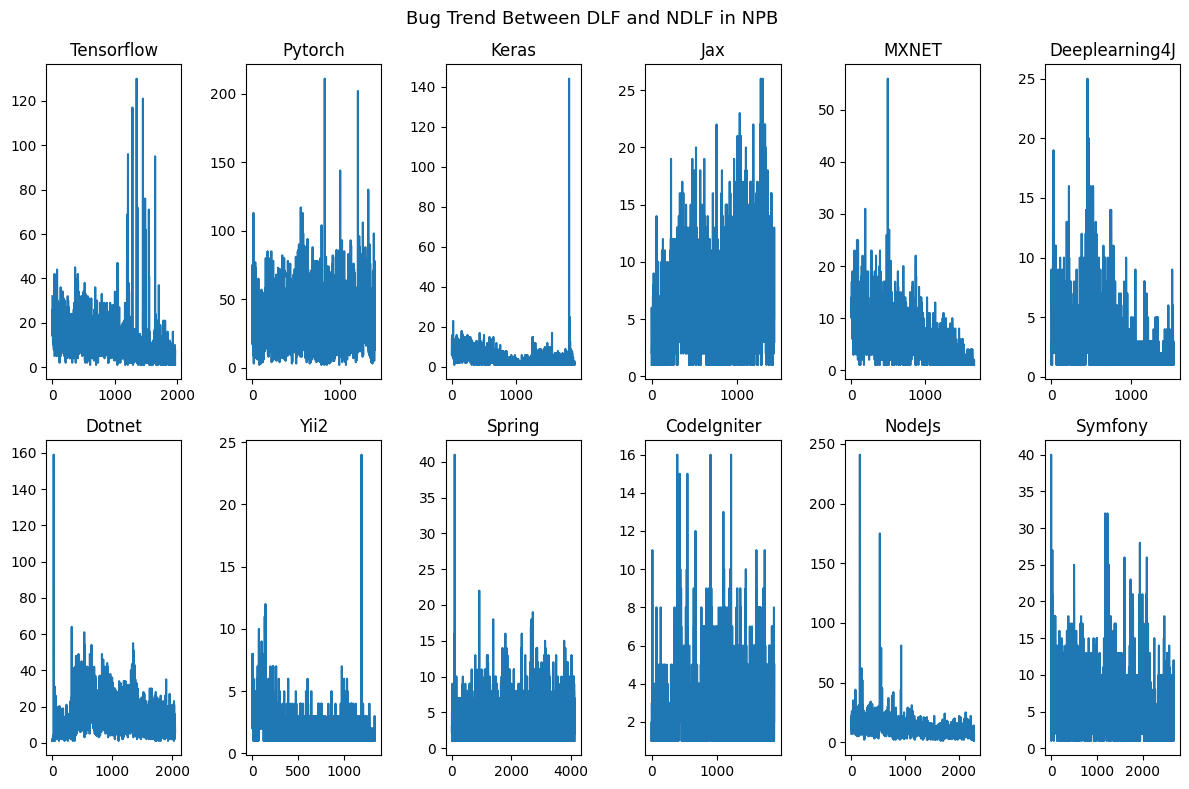

In [10]:
# Create a 2x3 subplot layout
fig, axs = plt.subplots(2, 6, figsize=(12, 8)) #i.e rows X columns

# Plot 1
axs[0, 0].plot((range(1, len(grp_df_count_tensorflow) + 1)),grp_df_count_tensorflow["Count"])
axs[0, 0].set_title('Tensorflow')

# Plot 2
axs[0, 1].plot((range(1, len(grp_df_count_pytorch) + 1)),grp_df_count_pytorch["Count"])
axs[0, 1].set_title('Pytorch')

axs[0, 2].plot((range(1, len(grp_df_count_keras) + 1)),grp_df_count_keras["Count"])
axs[0, 2].set_title('Keras')

axs[0, 3].plot((range(1, len(grp_df_count_jax) + 1)),grp_df_count_jax["Count"])
axs[0, 3].set_title('Jax')

axs[0, 4].plot((range(1, len(grp_df_count_mxnet) + 1)),grp_df_count_mxnet["Count"])
axs[0, 4].set_title('MXNET')

axs[0, 5].plot((range(1, len(grp_df_count_deeplearning4J) + 1)),grp_df_count_deeplearning4J["Count"])
axs[0, 5].set_title('Deeplearning4J')


# Non deep learning
axs[1, 0].plot((range(1, len(grp_df_count_aspnetcore) + 1)),grp_df_count_aspnetcore["Count"])
axs[1, 0].set_title('Dotnet')

axs[1, 1].plot((range(1, len(grp_df_count_yii2) + 1)),grp_df_count_yii2["Count"])
axs[1, 1].set_title('Yii2')

axs[1, 2].plot((range(1, len(grp_df_count_spring) + 1)),grp_df_count_spring["Count"])
axs[1, 2].set_title('Spring')

axs[1, 3].plot((range(1, len(grp_df_count_CodeIgniter4) + 1)),grp_df_count_CodeIgniter4["Count"])
axs[1, 3].set_title('CodeIgniter')

axs[1, 4].plot((range(1, len(grp_df_count_node) + 1)),grp_df_count_node["Count"])
axs[1, 4].set_title('NodeJs')

axs[1, 5].plot((range(1, len(grp_df_count_symfony) + 1)),grp_df_count_symfony["Count"])
axs[1, 5].set_title('Symfony')


plt.suptitle('Bug Trend Between DLF and NDLF in NPB ', fontsize=13)

# Adjust layout to prevent clipping of titles
plt.tight_layout() 

# plt.savefig("outputs/npf_grid_allframeworks_reported_trend.jpg")
# Show the plots
# plt.show()

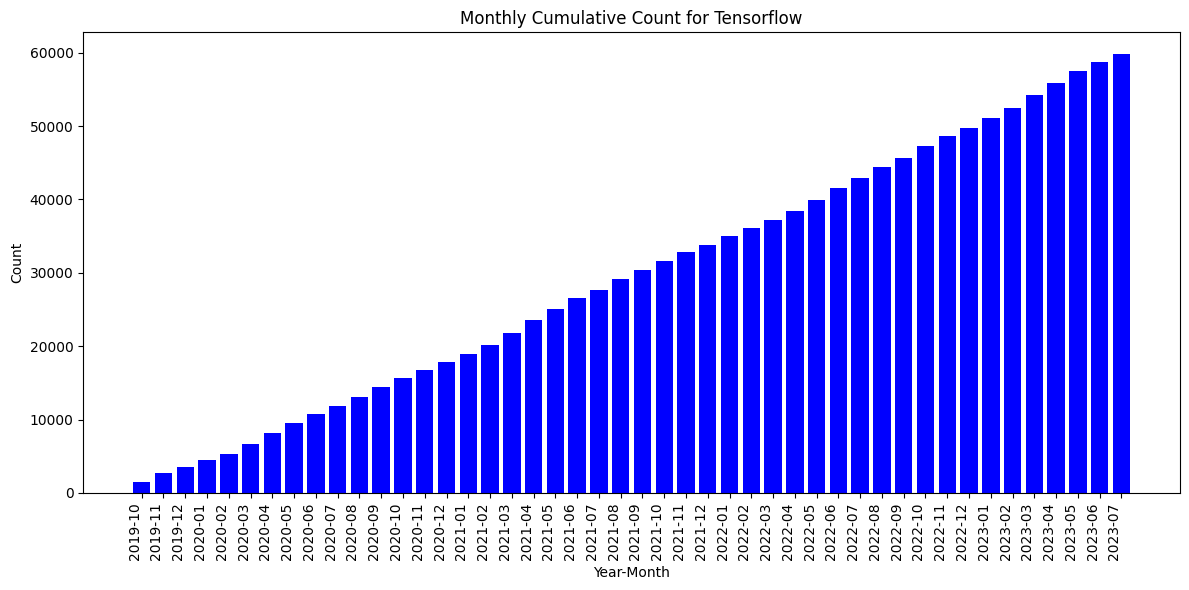

In [18]:
# pause for NOW
# plotting the bar chart distribution of issue reports and commits
# Issur eports

# daily_report_df_tensorflow = df_tensorflow.copy()  # Make a copy to avoid modifying the original DataFrame
# daily_report_df_tensorflow['Date_created'] = pd.to_datetime(daily_report_df_tensorflow['Date_created'])
# daily_report_df_tensorflow['Year_Month'] = daily_report_df_tensorflow['Date_created'].dt.to_period('M')  # Use period for monthly grouping
# daily_report_dff_tensorflow = daily_report_df_tensorflow.groupby(['Year_Month']).size().cumsum().reset_index(name='Count')
# daily_report_dff_tensorflow['Source'] = "Tensorflow"

# daily_report_df_pytorch = df_pytorch.copy()  # Make a copy to avoid modifying the original DataFrame
# daily_report_df_pytorch['Date_created'] = pd.to_datetime(daily_report_df_pytorch['Date_created'])
# daily_report_df_pytorch['Year_Month'] = daily_report_df_pytorch['Date_created'].dt.to_period('M')  # Use period for monthly grouping
# daily_report_dff_pytorch = daily_report_df_pytorch.groupby(['Year_Month']).size().cumsum().reset_index(name='Count')
# daily_report_dff_pytorch['Source'] = "Pytorch"

# daily_report_df_keras = df_keras.copy()  # Make a copy to avoid modifying the original DataFrame
# daily_report_df_keras['Date_created'] = pd.to_datetime(daily_report_df_keras['Date_created'])
# daily_report_df_keras['Year_Month'] = daily_report_df_keras['Date_created'].dt.to_period('M')  # Use period for monthly grouping
# daily_report_dff_keras = daily_report_df_keras.groupby(['Year_Month']).size().cumsum().reset_index(name='Count')
# daily_report_dff_keras['Source'] = "Keras"



# Plotting the bar graph with improved x-axis ticks
plt.figure(figsize=(12, 6))
plt.bar(daily_report_dff_pytorch['Year_Month'].astype(str), daily_report_dff_pytorch['Count'], color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Monthly Cumulative Count for Tensorflow')
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust y-axis ticks font size
plt.tight_layout()
plt.show()



### *********************** Boxplot Issue created trend

In [30]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(grp_df_count_tensorflow['Count'], grp_df_count_pytorch['Count'], grp_df_count_keras['Count'], grp_df_count_jax['Count'], grp_df_count_mxnet['Count'], grp_df_count_deeplearning4J['Count'], grp_df_count_aspnetcore['Count'], grp_df_count_yii2['Count'], grp_df_count_spring['Count'], grp_df_count_CodeIgniter4['Count'], grp_df_count_node['Count'], grp_df_count_symfony['Count'])

# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")





Kruskal-Wallis Statistic: 11960.0077940815
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [31]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(grp_df_count_tensorflow['Count'], grp_df_count_pytorch['Count'], grp_df_count_keras['Count'], grp_df_count_jax['Count'], grp_df_count_mxnet['Count'], grp_df_count_deeplearning4J['Count'], grp_df_count_aspnetcore['Count'], grp_df_count_yii2['Count'], grp_df_count_spring['Count'], grp_df_count_CodeIgniter4['Count'], grp_df_count_node['Count'], grp_df_count_symfony['Count'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")


F-statistic: 2805.4891317741367
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


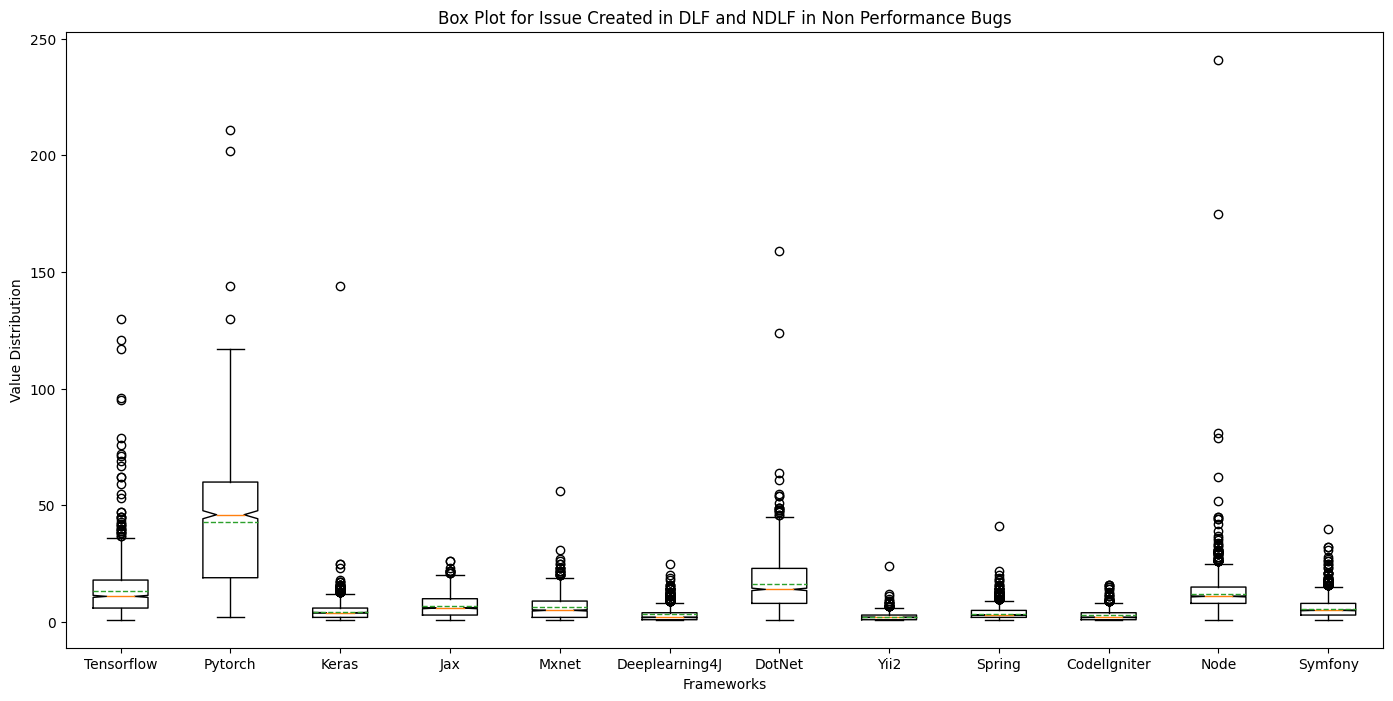

In [32]:
# All the frameworks combined.... number of issue reported 
# Create box plots
plt.figure(figsize=(17, 8)) 
plt.boxplot([grp_df_count_tensorflow['Count'], grp_df_count_pytorch['Count'], grp_df_count_keras['Count'], grp_df_count_jax['Count'], grp_df_count_mxnet['Count'], grp_df_count_deeplearning4J['Count'], grp_df_count_aspnetcore['Count'], grp_df_count_yii2['Count'], grp_df_count_spring['Count'], grp_df_count_CodeIgniter4['Count'], grp_df_count_node['Count'], grp_df_count_symfony['Count']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.xlabel("Frameworks")
plt.ylabel("Value Distribution")
plt.title("Box Plot for Issue Created in DLF and NDLF in Non Performance Bugs")
plt.savefig("outputs/npf_Boxplot_alldlndl_issue_created_trend.jpg")

plt.show()


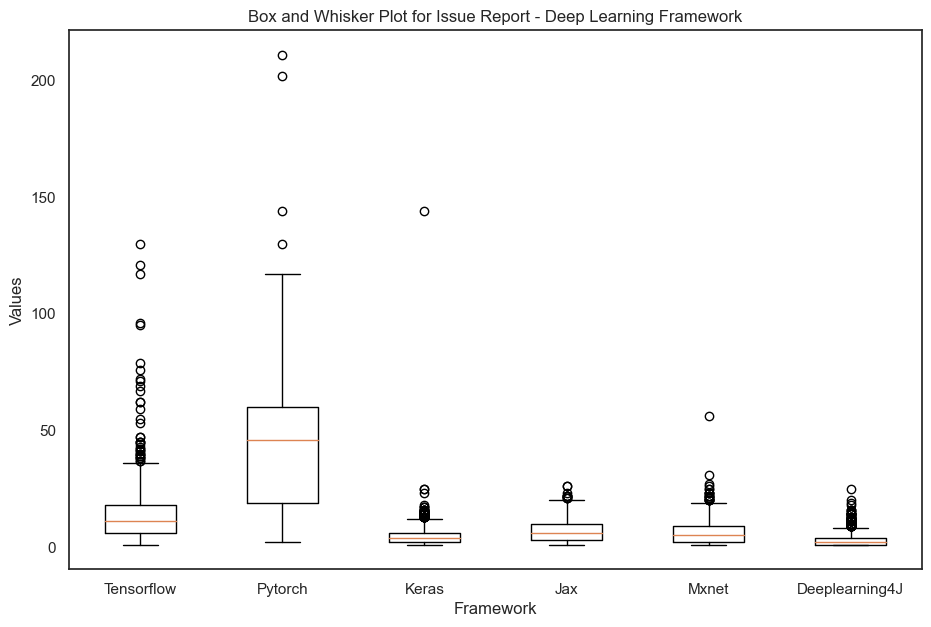

In [33]:
# Create a box and whisker plot using Matplotlib
sns.set(style="white") 
plt.figure(figsize=(11, 7))
plt.boxplot([grp_df_count_tensorflow['Count'], grp_df_count_pytorch['Count'], grp_df_count_keras['Count'], grp_df_count_jax['Count'], grp_df_count_mxnet['Count'], grp_df_count_deeplearning4J['Count']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J'], vert=True, patch_artist=False)

plt.title('Box and Whisker Plot for Issue Report - Deep Learning Framework')
plt.xlabel('Framework')
plt.ylabel('Values')

# plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

plt.show()


In [34]:
# plt.figure(figsize=(12, 7))

# sns.violinplot(x=all_df_combined_dl["Source"], y=all_df_combined_dl["Count"], linewidth=1, fill=True, inner="quart", density_norm="count")
# plt.title('Violin Plot for Issue Report - Deep Learning Frameworks')
# plt.xlabel('Frameworks')
# plt.ylabel('Values')
# # plt.savefig("outputs/npf_Violin_ByMonth_dl_framework.jpg")

# plt.show()

### Duration reported and closed

In [35]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Duration_reported_closed'], df_pytorch['Duration_reported_closed'], df_keras['Duration_reported_closed'], df_jax['Duration_reported_closed'], df_mxnet['Duration_reported_closed'], df_deeplearning4j['Duration_reported_closed'], df_aspnetcore['Duration_reported_closed'], df_yii2['Duration_reported_closed'], df_spring['Duration_reported_closed'], df_CodeIgniter4['Duration_reported_closed'], df_node['Duration_reported_closed'], df_symfony['Duration_reported_closed'])

# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 10112.986655844057
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [36]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Duration_reported_closed'], df_pytorch['Duration_reported_closed'], df_keras['Duration_reported_closed'], df_jax['Duration_reported_closed'], df_mxnet['Duration_reported_closed'], df_deeplearning4j['Duration_reported_closed'], df_aspnetcore['Duration_reported_closed'], df_yii2['Duration_reported_closed'], df_spring['Duration_reported_closed'], df_CodeIgniter4['Duration_reported_closed'], df_node['Duration_reported_closed'], df_symfony['Duration_reported_closed'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 1930.9688753516677
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


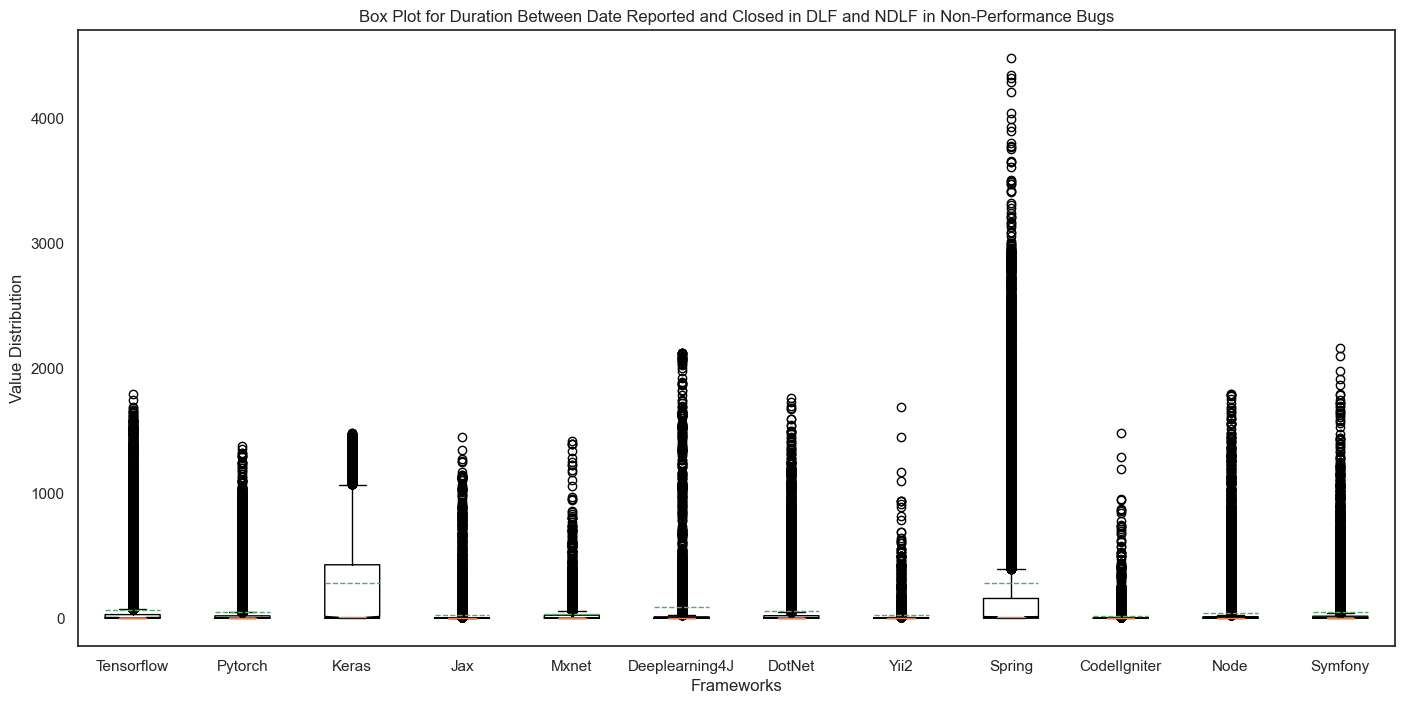

In [37]:
# All the frameworks combined.... duration reported closed 

# Create box plots
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Duration_reported_closed'], df_pytorch['Duration_reported_closed'], df_keras['Duration_reported_closed'], df_jax['Duration_reported_closed'], df_mxnet['Duration_reported_closed'], df_deeplearning4j['Duration_reported_closed'], df_aspnetcore['Duration_reported_closed'], df_yii2['Duration_reported_closed'], df_spring['Duration_reported_closed'], df_CodeIgniter4['Duration_reported_closed'], df_node['Duration_reported_closed'], df_symfony['Duration_reported_closed']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.xlabel("Frameworks")
plt.ylabel("Value Distribution")
plt.title("Box Plot for Duration Between Date Reported and Closed in DLF and NDLF in Non-Performance Bugs")
plt.savefig("outputs/npf_Boxplot_alldlndl_duration_reported_closed.jpg")

plt.show()


### Number of commits



In [38]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Count_all_commits'], df_pytorch['Count_all_commits'], df_keras['Count_all_commits'], df_jax['Count_all_commits'], df_mxnet['Count_all_commits'], df_deeplearning4j['Count_all_commits'], df_aspnetcore['Count_all_commits'], df_yii2['Count_all_commits'], df_spring['Count_all_commits'], df_CodeIgniter4['Count_all_commits'], df_node['Count_all_commits'], df_symfony['Count_all_commits'])

# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 108145.70182160303
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [39]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Count_all_commits'], df_pytorch['Count_all_commits'], df_keras['Count_all_commits'], df_jax['Count_all_commits'], df_mxnet['Count_all_commits'], df_deeplearning4j['Count_all_commits'], df_aspnetcore['Count_all_commits'], df_yii2['Count_all_commits'], df_spring['Count_all_commits'], df_CodeIgniter4['Count_all_commits'], df_node['Count_all_commits'], df_symfony['Count_all_commits'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 79.51105619265748
p-value: 4.1558734724479215e-180
Reject the null hypothesis, there are significant differences among groups.


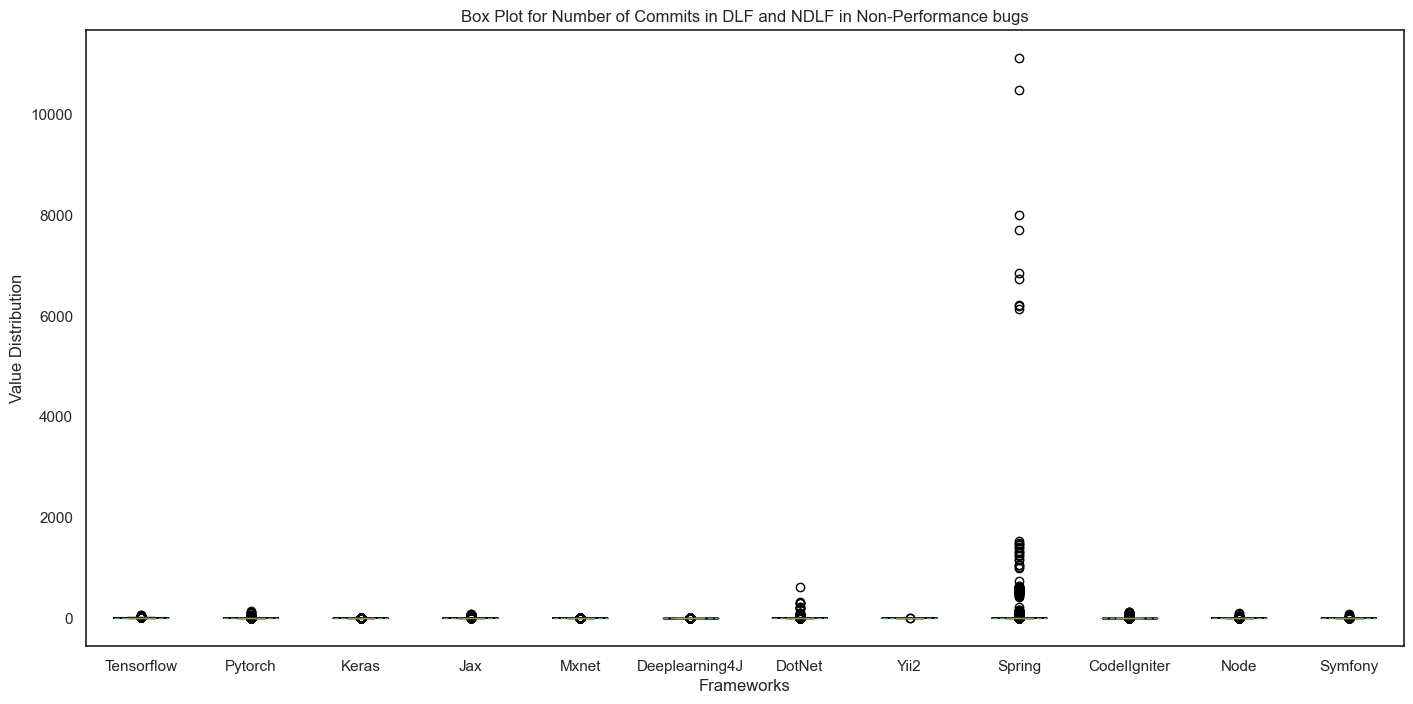

In [40]:
# All the frameworks combined.... number of commits 

# Create box plots
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Count_all_commits'], df_pytorch['Count_all_commits'], df_keras['Count_all_commits'], df_jax['Count_all_commits'], df_mxnet['Count_all_commits'], df_deeplearning4j['Count_all_commits'], df_aspnetcore['Count_all_commits'], df_yii2['Count_all_commits'], df_spring['Count_all_commits'], df_CodeIgniter4['Count_all_commits'], df_node['Count_all_commits'], df_symfony['Count_all_commits']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'] , vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.xlabel("Frameworks")
plt.ylabel("Value Distribution")
plt.title("Box Plot for Number of Commits in DLF and NDLF in Non-Performance bugs")
plt.savefig("outputs/npf_Boxplot_alldlndl_number_of_commits.jpg")

plt.show()

### Number of comitters

In [41]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Committers'], df_pytorch['Committers'], df_keras['Committers'], df_jax['Committers'], df_mxnet['Committers'], df_deeplearning4j['Committers'], df_aspnetcore['Committers'], df_yii2['Committers'], df_spring['Committers'], df_CodeIgniter4['Committers'], df_node['Committers'], df_symfony['Committers'])

# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 120967.3985888599
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [42]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Committers'], df_pytorch['Committers'], df_keras['Committers'], df_jax['Committers'], df_mxnet['Committers'], df_deeplearning4j['Committers'], df_aspnetcore['Committers'], df_yii2['Committers'], df_spring['Committers'], df_CodeIgniter4['Committers'], df_node['Committers'], df_symfony['Committers'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 6514.666624727242
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


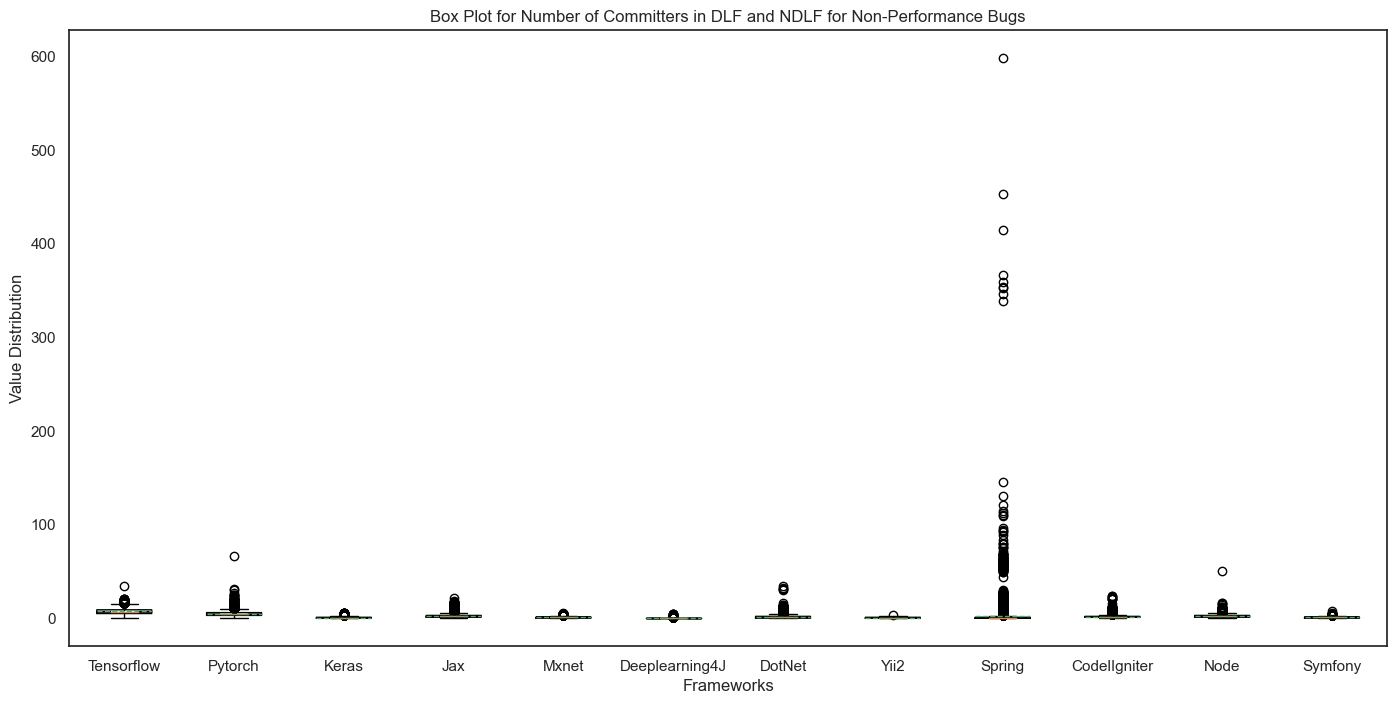

In [43]:
# All the frameworks combined.... number of commits 

# Create box plots
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Committers'], df_pytorch['Committers'], df_keras['Committers'], df_jax['Committers'], df_mxnet['Committers'], df_deeplearning4j['Committers'], df_aspnetcore['Committers'], df_yii2['Committers'], df_spring['Committers'], df_CodeIgniter4['Committers'], df_node['Committers'], df_symfony['Committers']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.xlabel("Frameworks")
plt.ylabel("Value Distribution")
plt.title("Box Plot for Number of Committers in DLF and NDLF for Non-Performance Bugs")
plt.savefig("outputs/npf_Boxplot_alldlndl_number_of_committers.jpg")

plt.show()

In [44]:
# Duration open and close
# Create a box and whisker plot using Matplotlib
# sns.set(style="white") 
# plt.figure(figsize=(11, 7))
# plt.boxplot([df_tensorflow['Duration_reported_closed'], df_pytorch['Duration_reported_closed'], df_keras['Duration_reported_closed'], grp_df_count_jax['Count'], df_mxnet['Duration_reported_closed'], df_deeplearning4j['Duration_reported_closed']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J'], vert=True, patch_artist=False)

# plt.title('Box and Whisker Plot for Duration of Open and Closed Report - Deep Learning Framework')
# plt.xlabel('Framework')
# plt.ylabel('Values')

# # plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

# plt.show()


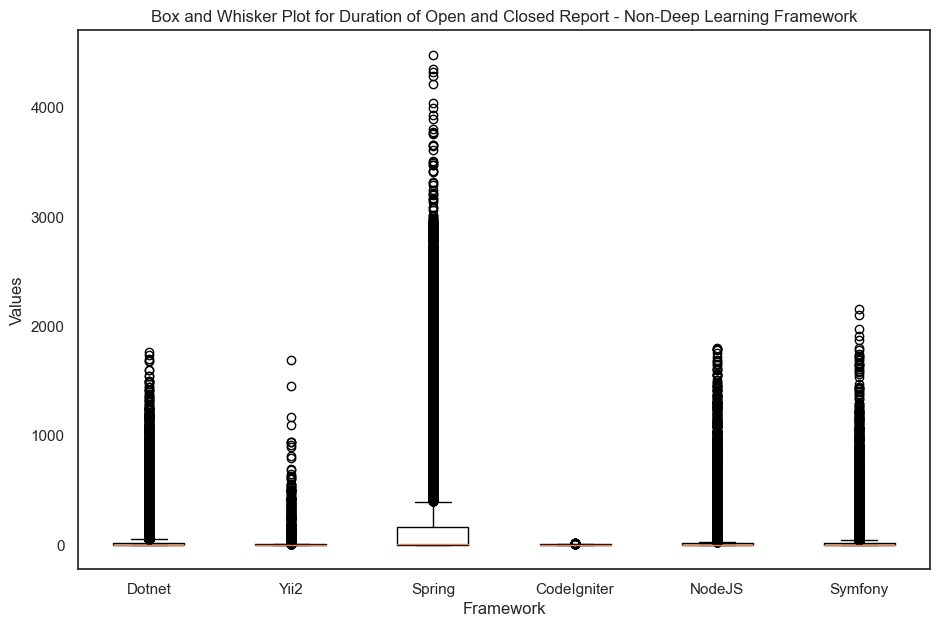

In [45]:
# Duration open and close
# Create a box and whisker plot using Matplotlib
sns.set(style="white") 
plt.figure(figsize=(11, 7))
plt.boxplot([df_aspnetcore['Duration_reported_closed'], df_yii2['Duration_reported_closed'], df_spring['Duration_reported_closed'], grp_df_count_CodeIgniter4['Count'], df_node['Duration_reported_closed'], df_symfony['Duration_reported_closed']], labels=['Dotnet', 'Yii2', 'Spring', 'CodeIgniter', 'NodeJS', 'Symfony'], vert=True, patch_artist=False)

plt.title('Box and Whisker Plot for Duration of Open and Closed Report - Non-Deep Learning Framework')
plt.xlabel('Framework')
plt.ylabel('Values')

# plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

plt.show()

### Duration reported first commit

In [46]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Duration_reported_first_commit'], df_pytorch['Duration_reported_first_commit'], df_keras['Duration_reported_first_commit'], df_jax['Duration_reported_first_commit'], df_mxnet['Duration_reported_first_commit'], df_deeplearning4j['Duration_reported_first_commit'], df_aspnetcore['Duration_reported_first_commit'], df_yii2['Duration_reported_first_commit'], df_spring['Duration_reported_first_commit'], df_CodeIgniter4['Duration_reported_first_commit'], df_node['Duration_reported_first_commit'], df_symfony['Duration_reported_first_commit'])
# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 74751.79815412602
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [47]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Duration_reported_first_commit'], df_pytorch['Duration_reported_first_commit'], df_keras['Duration_reported_first_commit'], df_jax['Duration_reported_first_commit'], df_mxnet['Duration_reported_first_commit'], df_deeplearning4j['Duration_reported_first_commit'], df_aspnetcore['Duration_reported_first_commit'], df_yii2['Duration_reported_first_commit'], df_spring['Duration_reported_first_commit'], df_CodeIgniter4['Duration_reported_first_commit'], df_node['Duration_reported_first_commit'], df_symfony['Duration_reported_first_commit'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 5596.3801617756035
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


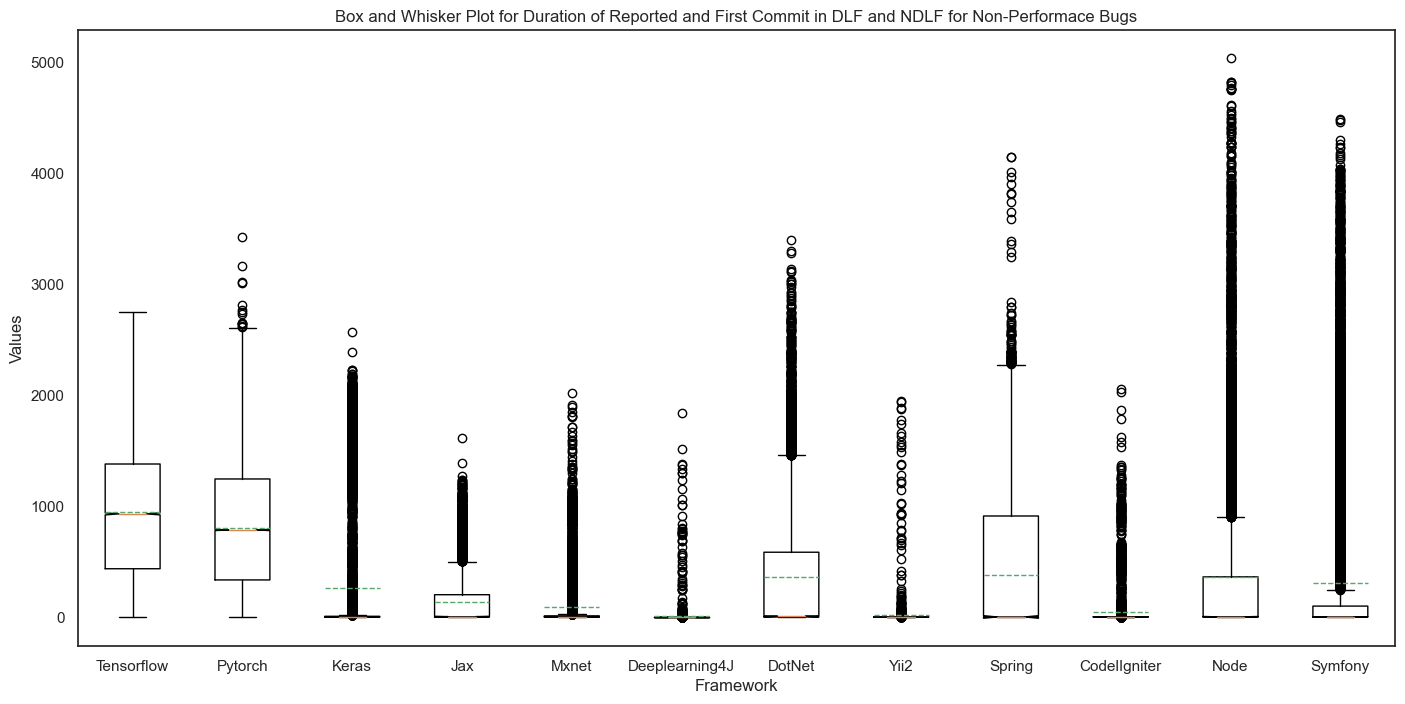

In [48]:
# Duration open and close
# Create a box and whisker plot using Matplotlib
sns.set(style="white") 
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Duration_reported_first_commit'], df_pytorch['Duration_reported_first_commit'], df_keras['Duration_reported_first_commit'], df_jax['Duration_reported_first_commit'], df_mxnet['Duration_reported_first_commit'], df_deeplearning4j['Duration_reported_first_commit'], df_aspnetcore['Duration_reported_first_commit'], df_yii2['Duration_reported_first_commit'], df_spring['Duration_reported_first_commit'], df_CodeIgniter4['Duration_reported_first_commit'], df_node['Duration_reported_first_commit'], df_symfony['Duration_reported_first_commit']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.title('Box and Whisker Plot for Duration of Reported and First Commit in DLF and NDLF for Non-Performace Bugs')
plt.xlabel('Framework')
plt.ylabel('Values')

# plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

plt.show()

### Duration first and last commit

In [49]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Duration_first_last_commit'], df_pytorch['Duration_first_last_commit'], df_keras['Duration_first_last_commit'], df_jax['Duration_first_last_commit'], df_mxnet['Duration_first_last_commit'], df_deeplearning4j['Duration_first_last_commit'], df_aspnetcore['Duration_first_last_commit'], df_yii2['Duration_first_last_commit'], df_spring['Duration_first_last_commit'], df_CodeIgniter4['Duration_first_last_commit'], df_node['Duration_first_last_commit'], df_symfony['Duration_first_last_commit'])
# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 100527.33207342828
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [50]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Duration_first_last_commit'], df_pytorch['Duration_first_last_commit'], df_keras['Duration_first_last_commit'], df_jax['Duration_first_last_commit'], df_mxnet['Duration_first_last_commit'], df_deeplearning4j['Duration_first_last_commit'], df_aspnetcore['Duration_first_last_commit'], df_yii2['Duration_first_last_commit'], df_spring['Duration_first_last_commit'], df_CodeIgniter4['Duration_first_last_commit'], df_node['Duration_first_last_commit'], df_symfony['Duration_first_last_commit'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 10789.338150571895
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


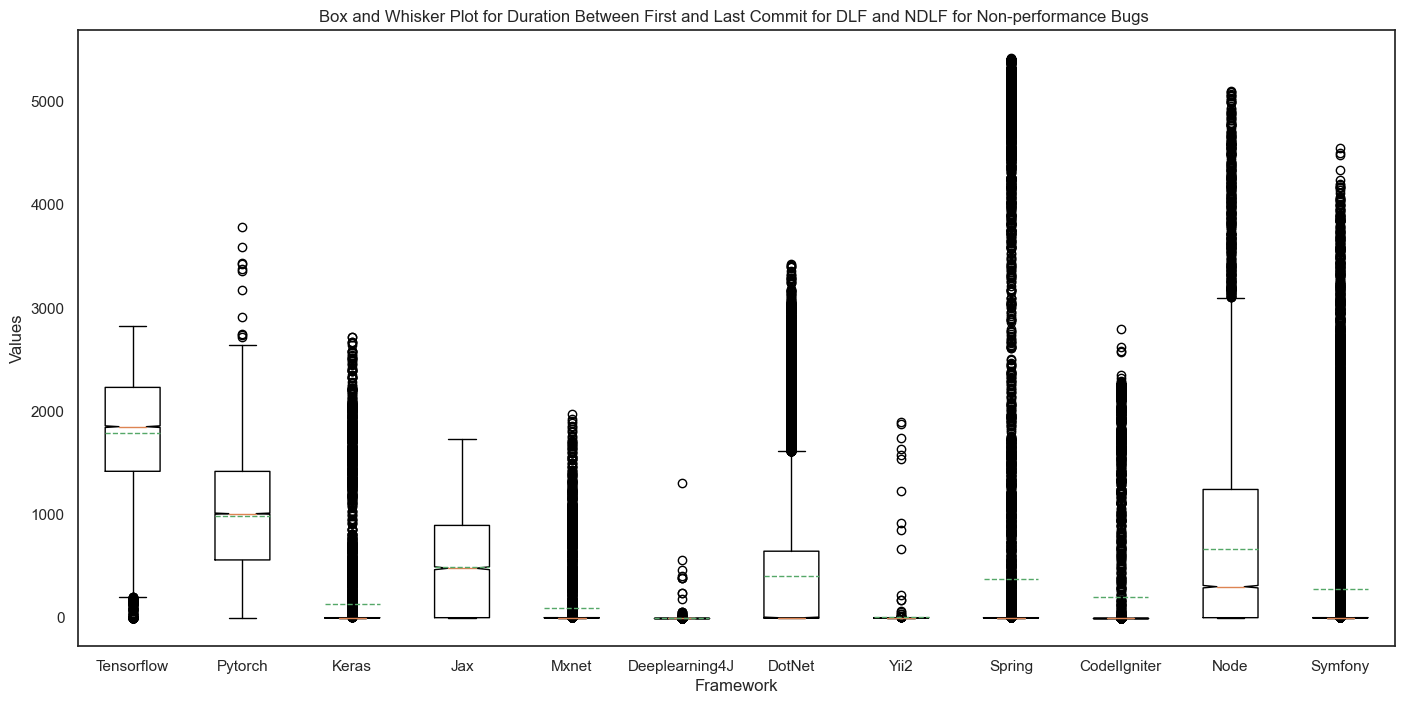

In [51]:
# Duration open and close
# Create a box and whisker plot using Matplotlib
sns.set(style="white") 
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Duration_first_last_commit'], df_pytorch['Duration_first_last_commit'], df_keras['Duration_first_last_commit'], df_jax['Duration_first_last_commit'], df_mxnet['Duration_first_last_commit'], df_deeplearning4j['Duration_first_last_commit'], df_aspnetcore['Duration_first_last_commit'], df_yii2['Duration_first_last_commit'], df_spring['Duration_first_last_commit'], df_CodeIgniter4['Duration_first_last_commit'], df_node['Duration_first_last_commit'], df_symfony['Duration_first_last_commit']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.title('Box and Whisker Plot for Duration Between First and Last Commit for DLF and NDLF for Non-performance Bugs ')
plt.xlabel('Framework')
plt.ylabel('Values')

# plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

plt.show()

### Duration reported last commit

In [52]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df_tensorflow['Duration_reported_last_commit'], df_pytorch['Duration_reported_last_commit'], df_keras['Duration_reported_last_commit'], df_jax['Duration_reported_last_commit'], df_mxnet['Duration_reported_last_commit'], df_deeplearning4j['Duration_reported_last_commit'], df_aspnetcore['Duration_reported_last_commit'], df_yii2['Duration_reported_last_commit'], df_spring['Duration_reported_last_commit'], df_CodeIgniter4['Duration_reported_last_commit'], df_node['Duration_reported_last_commit'], df_symfony['Duration_reported_last_commit'])
# Print the results
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences between the groups.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences between the groups.")

Kruskal-Wallis Statistic: 56168.01730600756
P-value: 0.0
The Kruskal-Wallis test result is statistically significant.
There are significant differences between the groups.


In [53]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_tensorflow['Duration_reported_last_commit'], df_pytorch['Duration_reported_last_commit'], df_keras['Duration_reported_last_commit'], df_jax['Duration_reported_last_commit'], df_mxnet['Duration_reported_last_commit'], df_deeplearning4j['Duration_reported_last_commit'], df_aspnetcore['Duration_reported_last_commit'], df_yii2['Duration_reported_last_commit'], df_spring['Duration_reported_last_commit'], df_CodeIgniter4['Duration_reported_last_commit'], df_node['Duration_reported_last_commit'], df_symfony['Duration_reported_last_commit'])

# Output the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis, there are significant differences among groups.")
else:
    print("Fail to reject the null hypothesis, there are no significant differences among groups.")

F-statistic: 3739.5654328998303
p-value: 0.0
Reject the null hypothesis, there are significant differences among groups.


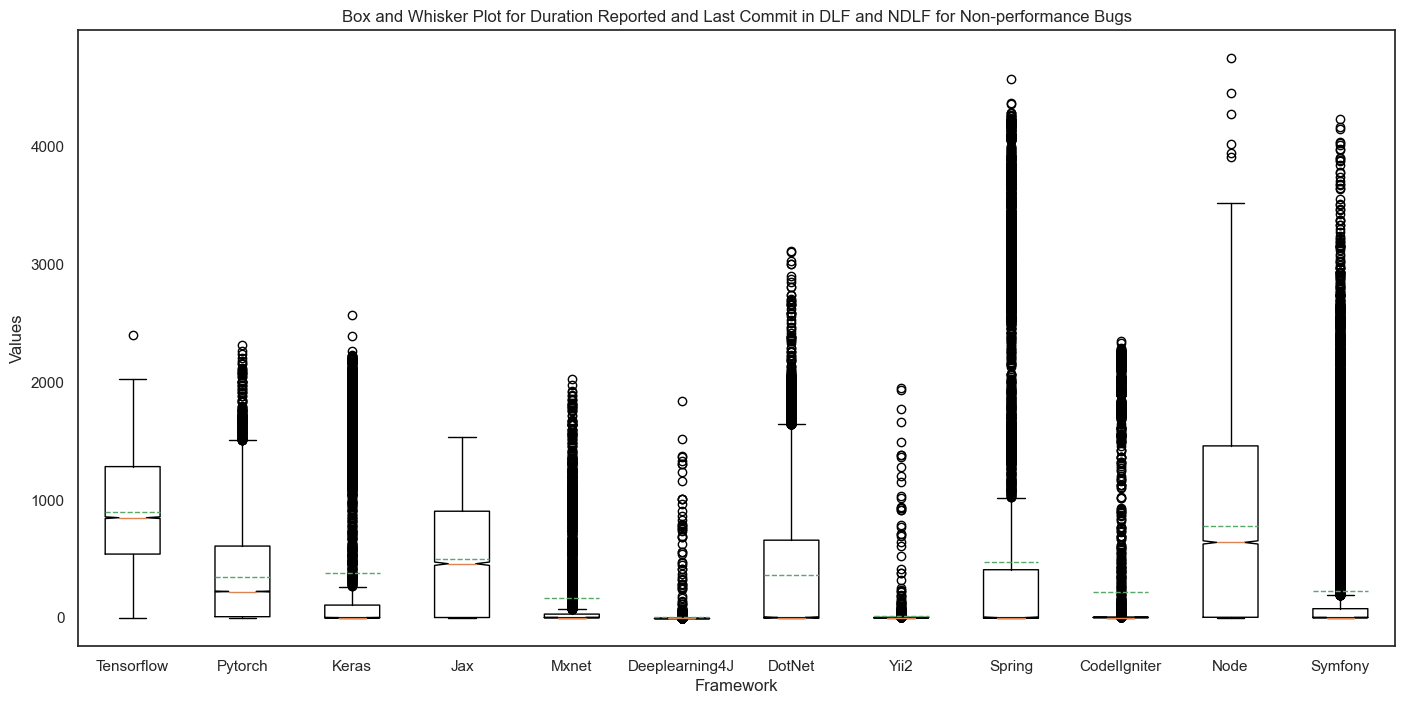

In [54]:
# Create a box and whisker plot using Matplotlib
sns.set(style="white") 
plt.figure(figsize=(17, 8))
plt.boxplot([df_tensorflow['Duration_reported_last_commit'], df_pytorch['Duration_reported_last_commit'], df_keras['Duration_reported_last_commit'], df_jax['Duration_reported_last_commit'], df_mxnet['Duration_reported_last_commit'], df_deeplearning4j['Duration_reported_last_commit'], df_aspnetcore['Duration_reported_last_commit'], df_yii2['Duration_reported_last_commit'], df_spring['Duration_reported_last_commit'], df_CodeIgniter4['Duration_reported_last_commit'], df_node['Duration_reported_last_commit'], df_symfony['Duration_reported_last_commit']], labels=['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony'], vert=True, patch_artist=False, notch = True, showmeans = True, meanline = True, showfliers = True)

plt.title('Box and Whisker Plot for Duration Reported and Last Commit in DLF and NDLF for Non-performance Bugs')
plt.xlabel('Framework')
plt.ylabel('Values')

# plt.savefig("outputs/npf_Boxplot_dl_framework.jpg")

plt.show()

In [55]:


def cox_stuart_test(data):
    n = len(data)
    
    # Calculate ranks
    ranks = data.rank()
    
    # Calculate the test statistic
    q = ranks.sum() / (n * (n + 1) / 2)
    
    return q

def cox_stuart_test_right(data_series, alpha=0.05):
    n = len(data_series)
    
    # Get critical value for the right-sided test
    critical_value = 1.645  # You can replace this with the appropriate critical value
    
    # Calculate the test statistic
    q = cox_stuart_test(data_series)
    
    # Perform the test
    if q > critical_value:
        print(f"Reject the null hypothesis. There is evidence of an increasing trend (p-value < {alpha}).")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant evidence of an increasing trend (p-value >= {alpha}).")

# Example usage with a DataFrame
df = pd.DataFrame({'column_name': [10, 15, 20, 25, 30]})
data_series = df['column_name']
cox_stuart_test_right(df_yii2['Duration_reported_last_commit'])


Fail to reject the null hypothesis. There is no significant evidence of an increasing trend (p-value >= 0.05).


In [56]:
a = 261
b = 281
total = a+b
a_percent = (a/total)*100
b_percent = (b/total)*100
difference_percent= a_percent-b_percent
print(f"A Percent =  {a_percent}")
print(f"B Percent =  {b_percent}")
print(f"difference_percent =  {difference_percent}")

A Percent =  48.154981549815496
B Percent =  51.8450184501845
difference_percent =  -3.6900369003690017


### Plotting of SCOTTKNOTTESD Test


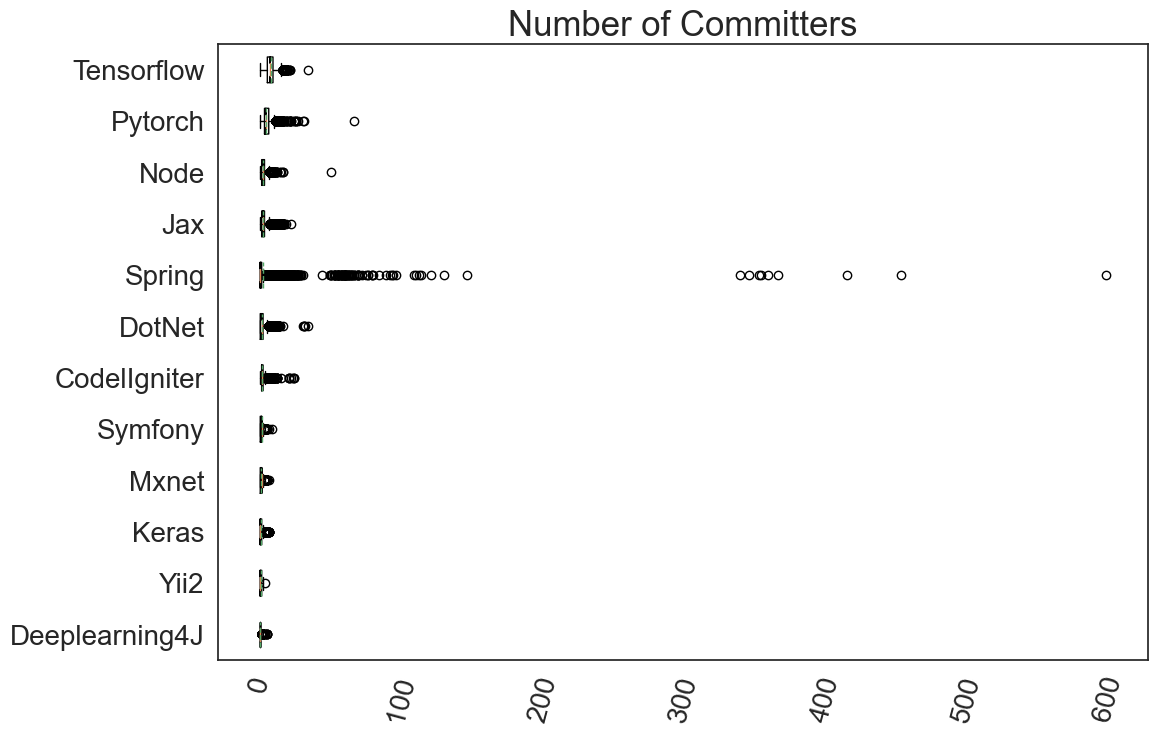

In [71]:
# Assuming 'grp_df_count_tensorflow', 'grp_df_count_pytorch', ... are your DataFrames

# Create a list of DataFrames for each framework and their corresponding labels
frameworks_data = [df_tensorflow['Committers'], df_pytorch['Committers'], df_keras['Committers'], df_jax['Committers'], df_mxnet['Committers'], df_deeplearning4j['Committers'], df_aspnetcore['Committers'], df_yii2['Committers'], df_spring['Committers'], df_CodeIgniter4['Committers'], df_node['Committers'], df_symfony['Committers']]



frameworks_labels = ['Tensorflow', 'Pytorch', 'Keras', 'Jax', 'Mxnet', 'Deeplearning4J', 'DotNet', 'Yii2', 'Spring', 'CodelIgniter', 'Node', 'Symfony']

# Calculate the mean distribution for each framework
mean_distributions = [df.mean() for df in frameworks_data]

# Arrange frameworks in descending order based on mean distribution
sorted_indices = sorted(range(len(mean_distributions)), key=lambda k: mean_distributions[k], reverse=False)

sorted_frameworks_data = [frameworks_data[i] for i in sorted_indices]
sorted_frameworks_labels = [frameworks_labels[i] for i in sorted_indices]

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(sorted_frameworks_data, labels=sorted_frameworks_labels, vert=False, patch_artist=False, notch=True, showmeans=True, meanline=True, showfliers=True)

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
# plt.grid(True, linestyle='--', alpha=0.1)
plt.title('Number of Committers', fontsize=25)
# plt.xlabel('Frameworks')
# plt.ylabel('Count')

plt.show()


In [68]:
df_tensorflow['Count_all_commits'].max()

71